In [1]:
#IMPORTING NECESSARY LIBRARIES AND READ THE CSV FILE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from mlxtend.plotting import plot_confusion_matrix

tfidf=TfidfVectorizer()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
model=LogisticRegression()

In [2]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [3]:
#DROPING THE COLUMNS WHICH ARE NOT IN USE
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [4]:
#RENAMING THE COLUMNS TO INCREASE THE READABILITY
df.columns = ['label', 'message']
df

label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [5]:
#CHECKING FOR NULL VALUES
df.isna().sum()

label      0
message    0
dtype: int64

In [6]:
#CONVERTING THE LABEL IN BINARY VALUE
df['label'].replace({'spam':1,'ham':0},inplace=True)
df

label                                            message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u oni...
2         1  Free entry in 2 a wkly comp to win FA Cup fina...
3         0  U dun say so early hor... U c already then say...
4         0  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567      1  This is the 2nd time we have tried 2 contact u...
5568      0              Will Ì_ b going to esplanade fr home?
5569      0  Pity, * was in mood for that. So...any other s...
5570      0  The guy did some bitching but I acted like i'd...
5571      0                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [7]:
print("(Row, Column) =",df.shape)

(Row, Column) = (5572, 2)


In [8]:
df.describe()

label
count  5572.000000
mean      0.134063
std       0.340751
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [10]:
df.duplicated().sum()

403

In [11]:
df=df.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [12]:
df.duplicated().sum()

0

In [13]:
val=df['label'].value_counts()
val

0    4516
1     653
Name: label, dtype: int64

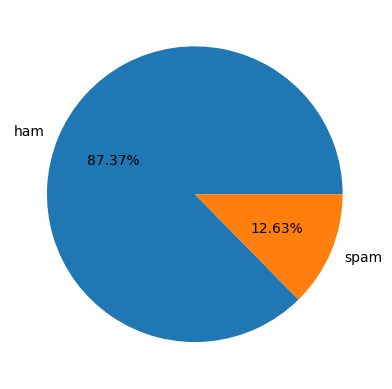

In [14]:
plt.pie(val,labels=['ham','spam'],autopct='%0.02f%%')
plt.show()

In [15]:
import nltk
# nltk.download('punkt')

In [16]:
df['No_of_Characters'] = df['message'].str.len()
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16860\360240886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_Characters'] = df['message'].str.len()


label                                            message  No_of_Characters
0      0  Go until jurong point, crazy.. Available only ...               111
1      0                      Ok lar... Joking wif u oni...                29
2      1  Free entry in 2 a wkly comp to win FA Cup fina...               155
3      0  U dun say so early hor... U c already then say...                49
4      0  Nah I don't think he goes to usf, he lives aro...                61

In [17]:
df['No_of_Words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16860\2882463815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_Words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))


label                                            message  No_of_Characters  \
0      0  Go until jurong point, crazy.. Available only ...               111   
1      0                      Ok lar... Joking wif u oni...                29   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...               155   
3      0  U dun say so early hor... U c already then say...                49   
4      0  Nah I don't think he goes to usf, he lives aro...                61   

   No_of_Words  
0           24  
1            8  
2           37  
3           13  
4           15

In [18]:
df['No_of_Sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16860\3736612889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_Sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


label                                            message  No_of_Characters  \
0      0  Go until jurong point, crazy.. Available only ...               111   
1      0                      Ok lar... Joking wif u oni...                29   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...               155   
3      0  U dun say so early hor... U c already then say...                49   
4      0  Nah I don't think he goes to usf, he lives aro...                61   

   No_of_Words  No_of_Sentences  
0           24                2  
1            8                2  
2           37                2  
3           13                1  
4           15                1

In [19]:
df[['No_of_Characters','No_of_Words','No_of_Sentences']].describe()

No_of_Characters  No_of_Words  No_of_Sentences
count       5169.000000  5169.000000      5169.000000
mean          78.977945    18.455794         1.965564
std           58.236293    13.324758         1.448541
min            2.000000     1.000000         1.000000
25%           36.000000     9.000000         1.000000
50%           60.000000    15.000000         1.000000
75%          117.000000    26.000000         2.000000
max          910.000000   220.000000        38.000000

In [20]:
#FOR HAM MESSAGES
df[df['label']==0][['No_of_Characters','No_of_Words','No_of_Sentences']].describe()

No_of_Characters  No_of_Words  No_of_Sentences
count       4516.000000  4516.000000      4516.000000
mean          70.459256    17.123782         1.820195
std           56.358207    13.493970         1.383657
min            2.000000     1.000000         1.000000
25%           34.000000     8.000000         1.000000
50%           52.000000    13.000000         1.000000
75%           90.000000    22.000000         2.000000
max          910.000000   220.000000        38.000000

In [21]:
#FOR SPAM MESSAGES
df[df['label']==1][['No_of_Characters','No_of_Words','No_of_Sentences']].describe()

No_of_Characters  No_of_Words  No_of_Sentences
count        653.000000   653.000000       653.000000
mean         137.891271    27.667688         2.970904
std           30.137753     7.008418         1.488425
min           13.000000     2.000000         1.000000
25%          132.000000    25.000000         2.000000
50%          149.000000    29.000000         3.000000
75%          157.000000    32.000000         4.000000
max          224.000000    46.000000         9.000000

<AxesSubplot: xlabel='No_of_Characters', ylabel='Count'>

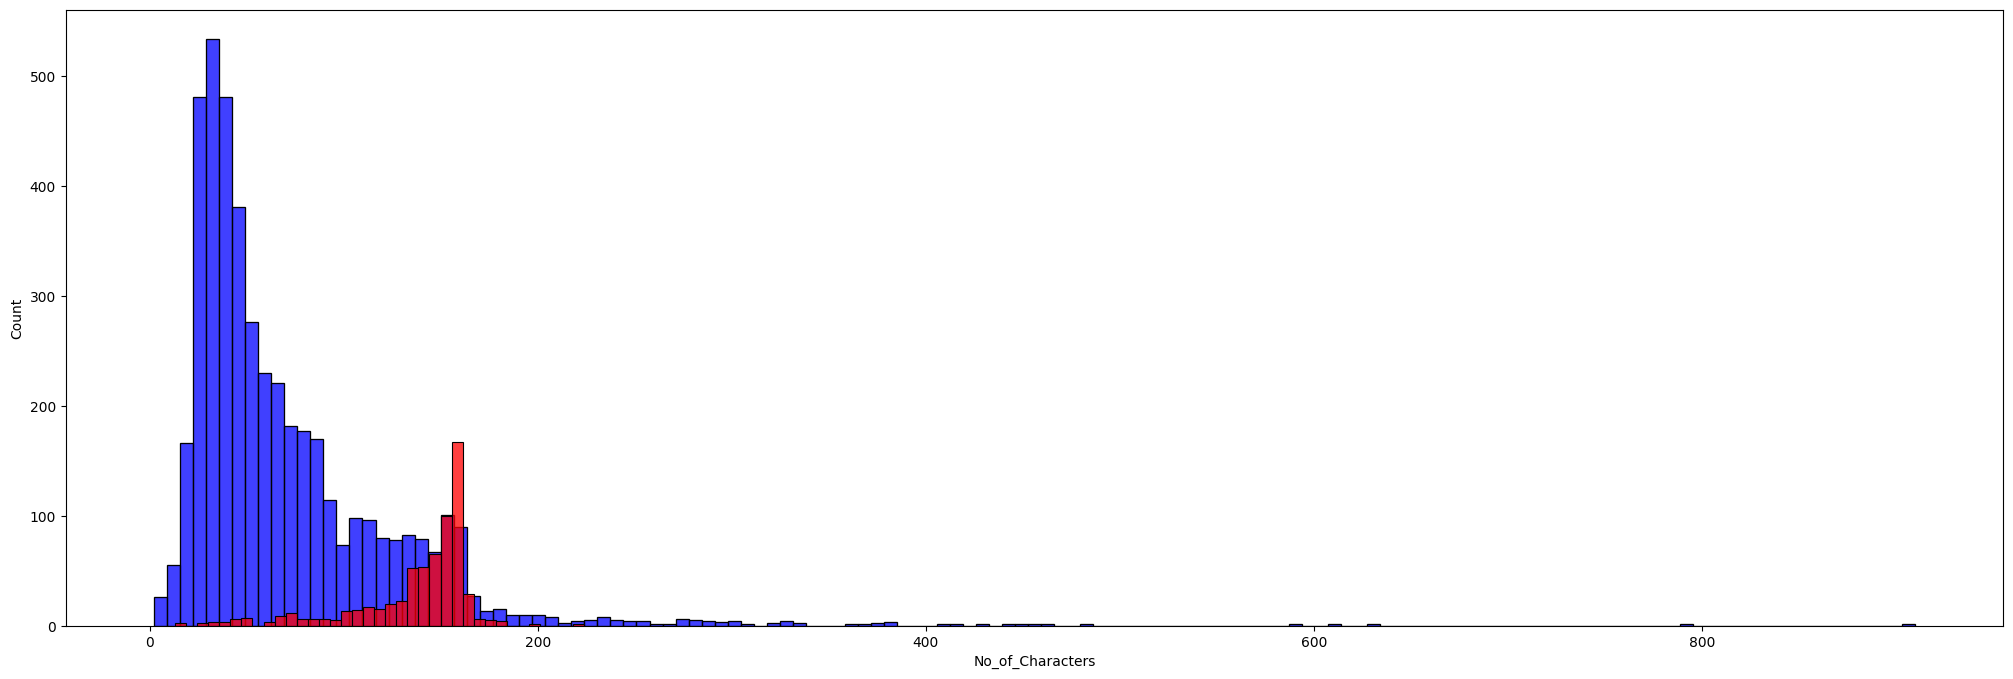

In [22]:
plt.figure(figsize=(25,8))
sns.histplot(df[df['label']==0]['No_of_Characters'],color='blue')
sns.histplot(df[df['label']==1]['No_of_Characters'],color='red')

<AxesSubplot: xlabel='No_of_Words', ylabel='Count'>

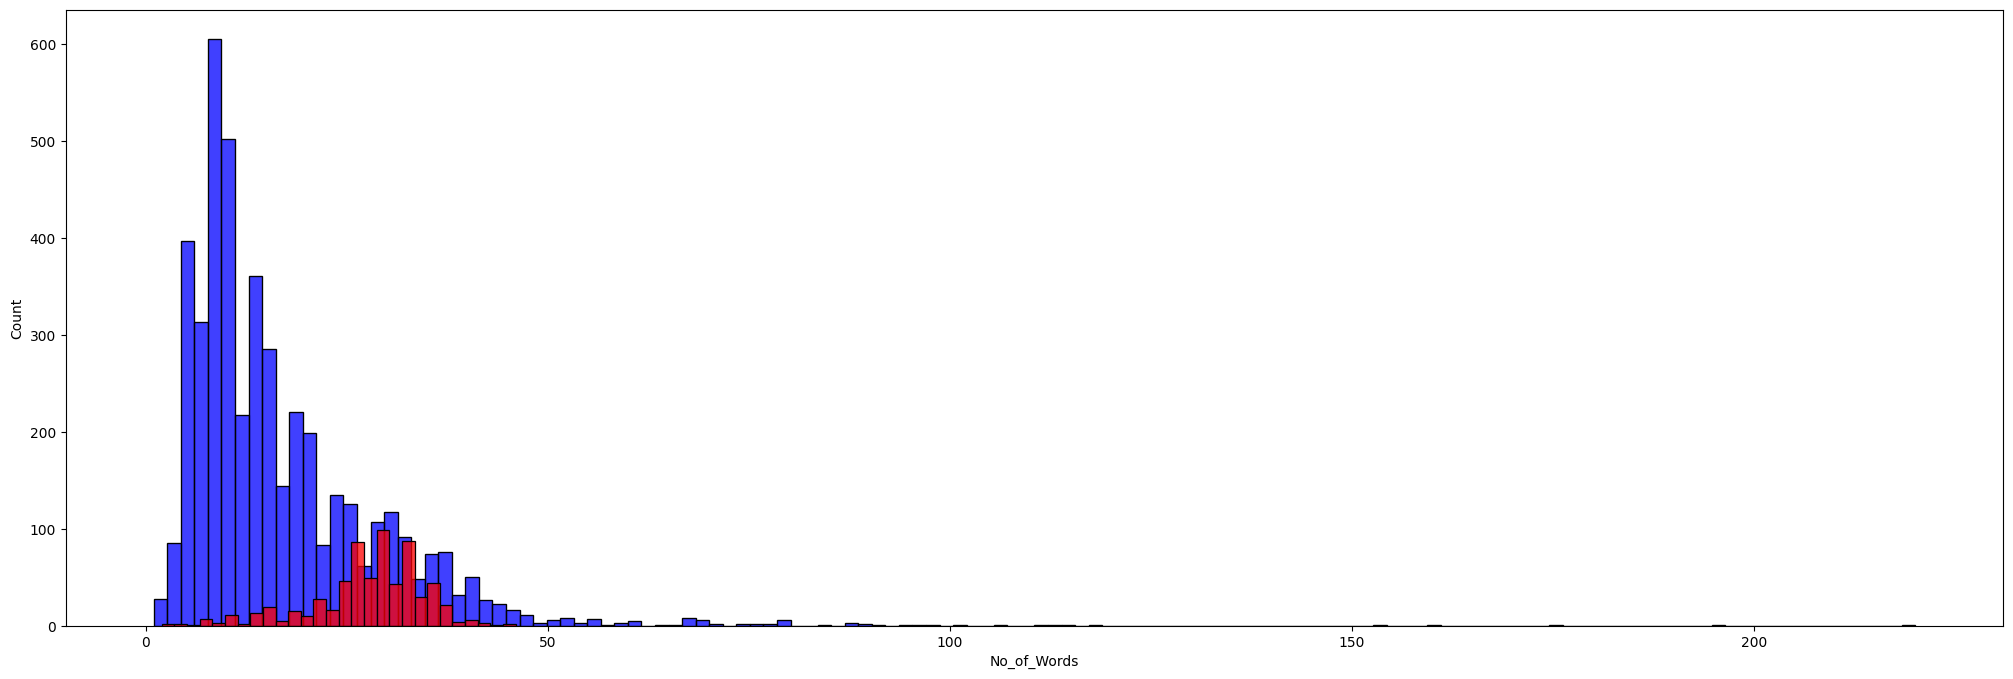

In [23]:
plt.figure(figsize=(25,8))
sns.histplot(df[df['label']==0]['No_of_Words'],color='blue')
sns.histplot(df[df['label']==1]['No_of_Words'],color='red')

<AxesSubplot: xlabel='No_of_Sentences', ylabel='Count'>

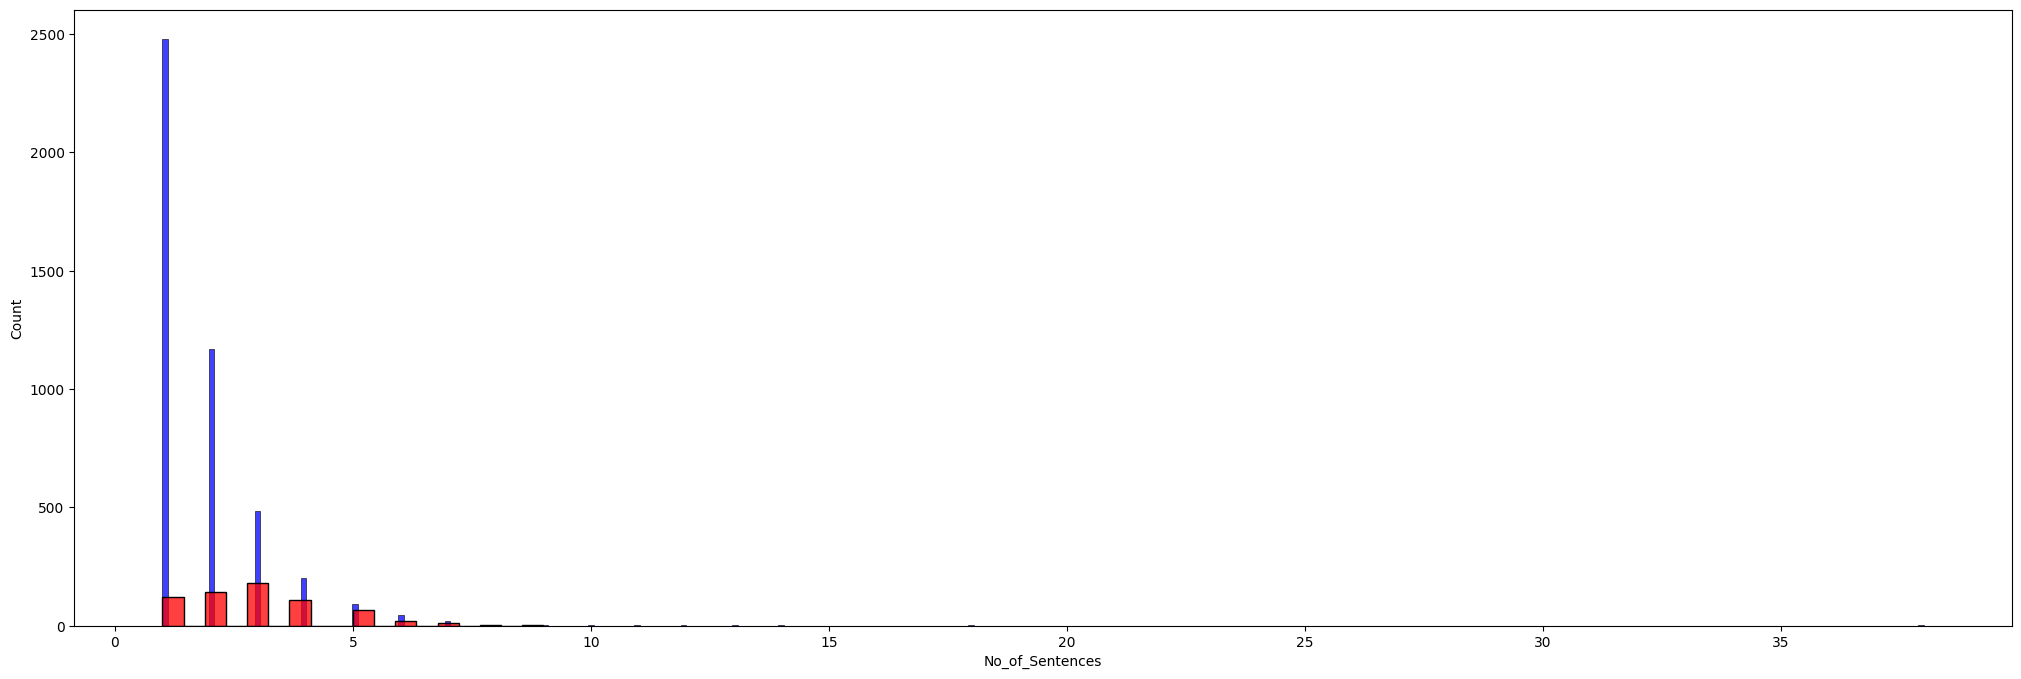

In [24]:
plt.figure(figsize=(25,8))
sns.histplot(df[df['label']==0]['No_of_Sentences'],color='blue')
sns.histplot(df[df['label']==1]['No_of_Sentences'],color='red')

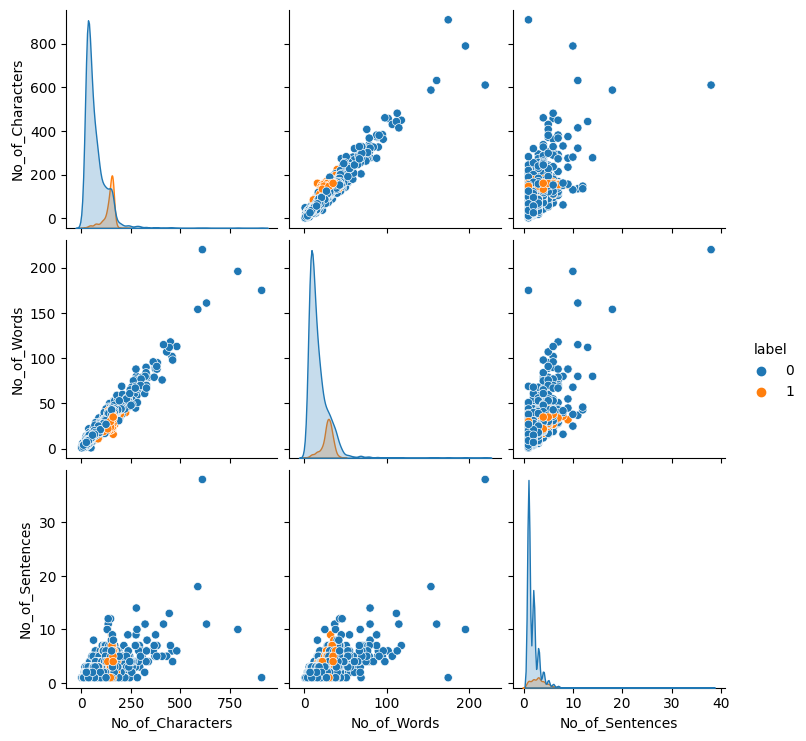

In [25]:
sns.pairplot(df,hue='label')

In [26]:
import plotly.express as px
fig = px.imshow(df.corr(),text_auto=True,aspect="auto")
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16860\1904233665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(df.corr(),text_auto=True,aspect="auto")


C:\Users\HP\AppData\Local\Temp\ipykernel_16860\1674388894.py:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



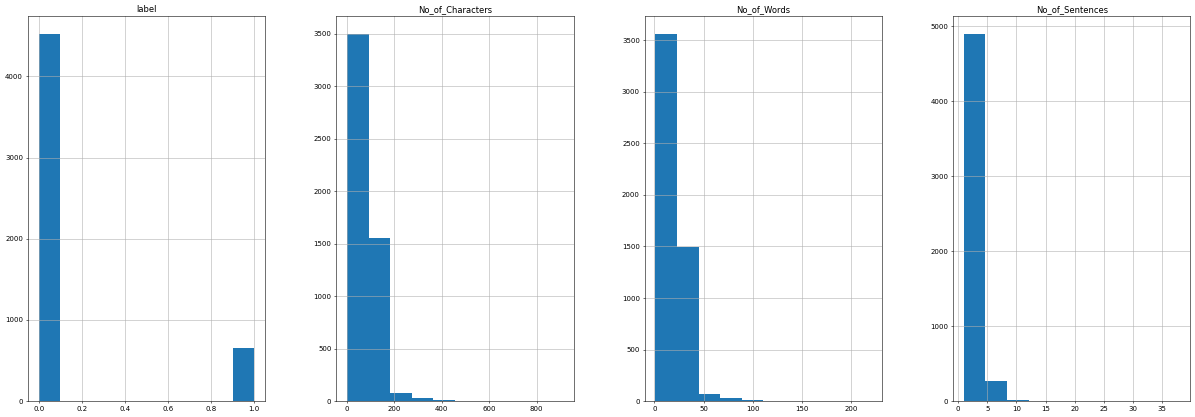

In [27]:
fig, ax = plt.subplots(figsize=(30,10), dpi=50);
df.hist(ax=ax, layout=(1,4), alpha=1);

In [28]:
#DATA PREPROCESSING
#LOWER CASE
#TOKENIZATION
#REMOVE SPECIAL CHARACTERS
#REMOVE STOP WORDS
#STEMMING

from nltk.corpus import stopwords
import string

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [29]:
def textTransform(txt):
    txt=txt.lower()
    txt=nltk.word_tokenize(txt)
    
    y=[]
    for i in  txt:
        if(i.isalnum()):
            y.append(i)
    
    txt=y[0:len(y)]
    y.clear()
    
    for i in txt:
        if(i not in stopwords.words('english') and i not in string.punctuation):
            y.append(i)
            
    txt=y[0:len(y)]
    y.clear()
    
    for i in txt:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [30]:
df['Transformed_text']=df['message'].apply(textTransform)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16860\2483551656.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



label                                            message  No_of_Characters  \
0      0  Go until jurong point, crazy.. Available only ...               111   
1      0                      Ok lar... Joking wif u oni...                29   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...               155   
3      0  U dun say so early hor... U c already then say...                49   
4      0  Nah I don't think he goes to usf, he lives aro...                61   

   No_of_Words  No_of_Sentences  \
0           24                2   
1            8                2   
2           37                2   
3           13                1   
4           15                1   

                                    Transformed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though

In [31]:
# !pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=600,height=500,min_font_size=10,background_color='white')

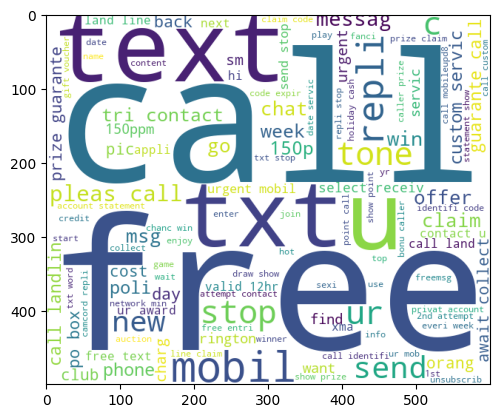

In [32]:
#WORD CLOUD FOR SPAM MESSAGES
spam_wordCloud=wc.generate(df[df['label'] ==1]['Transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wordCloud)

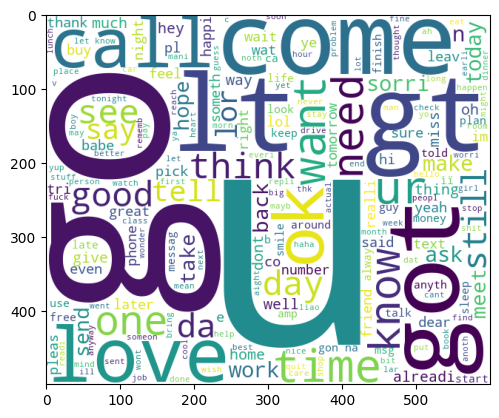

In [33]:
#WORD CLOUD FOR HAM MESSAGES
ham_wordCloud=wc.generate(df[df['label'] ==0]['Transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wordCloud)

In [34]:
X = tfidf.fit_transform(df['Transformed_text'].values).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
X.shape

(5169, 6708)

In [36]:
Y=df['label'].values
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
print("Shape of X :",X.shape)
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)

Shape of X : (5169, 6708)
Shape of X_train : (4135, 6708)
Shape of X_test : (1034, 6708)


In [39]:
print("Shape of Y :",Y.shape)
print("Shape of Y_train :",Y_train.shape)
print("Shape of Y_test :",Y_test.shape)

Shape of Y : (5169,)
Shape of Y_train : (4135,)
Shape of Y_test : (1034,)


In [40]:
#Gaussian Naive Bayes classifier

In [41]:
#FIT THE TRAIN DATA TO TRAIN THE MODEL
gnb.fit(X_train,Y_train)

GaussianNB()

In [42]:
#TEST THE DATA
Y_pred1=gnb.predict(X_test)

In [43]:
print("Accuracy is :: ",accuracy_score(Y_test,Y_pred1)*100)

Accuracy is ::  87.62088974854933


In [44]:
mat=confusion_matrix(Y_test,Y_pred1)
mat

array([[793, 103],
       [ 25, 113]], dtype=int64)

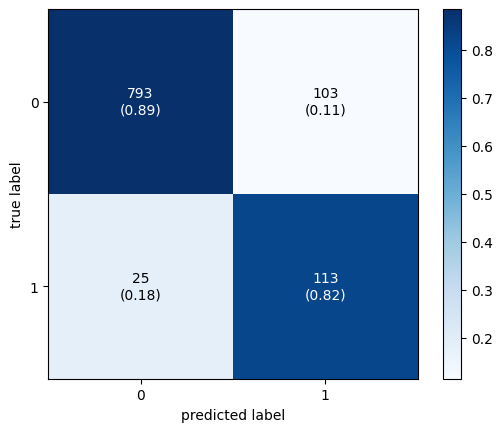

In [45]:
plot_confusion_matrix(mat,show_normed=True, colorbar=True, show_absolute=True)   
plt.show()

In [46]:
precision=precision_score(Y_test,Y_pred1)
recall=recall_score(Y_test,Y_pred1)
f1_sc=f1_score(Y_test,Y_pred1)

In [47]:
print("Precision :: ",precision)
print(" Recall   :: ",recall)
print("f1_score  :: ",f1_sc)

Precision ::  0.5231481481481481
 Recall   ::  0.8188405797101449
f1_score  ::  0.6384180790960452


In [48]:
#Multinomial Naive Bayes
mnb.fit(X_train,Y_train)

MultinomialNB()

In [49]:
Y_pred2=mnb.predict(X_test)

In [50]:
print("Accuracy is :: ",accuracy_score(Y_test,Y_pred2)*100)

Accuracy is ::  95.93810444874275


In [51]:
mat=confusion_matrix(Y_test,Y_pred2)
mat

array([[896,   0],
       [ 42,  96]], dtype=int64)

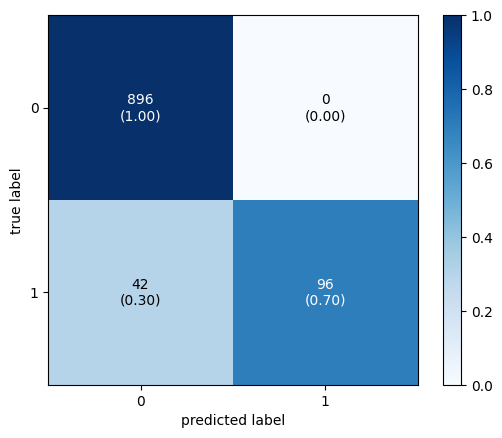

In [52]:
plot_confusion_matrix(mat,show_normed=True, colorbar=True, show_absolute=True)   
plt.show()

In [53]:
precision=precision_score(Y_test,Y_pred2)
recall=recall_score(Y_test,Y_pred2)
f1_sc=f1_score(Y_test,Y_pred2)

In [54]:
print("Precision :: ",precision)
print(" Recall   :: ",recall)
print("f1_score  :: ",f1_sc)

Precision ::  1.0
 Recall   ::  0.6956521739130435
f1_score  ::  0.8205128205128205


In [55]:
#Bernoulli Naive Bayes
bnb.fit(X_train,Y_train)

BernoulliNB()

In [56]:
Y_pred3=bnb.predict(X_test)

In [57]:
print("Accuracy is :: ",accuracy_score(Y_test,Y_pred3)*100)

Accuracy is ::  97.00193423597679


In [58]:
mat=confusion_matrix(Y_test,Y_pred3)
mat

array([[893,   3],
       [ 28, 110]], dtype=int64)

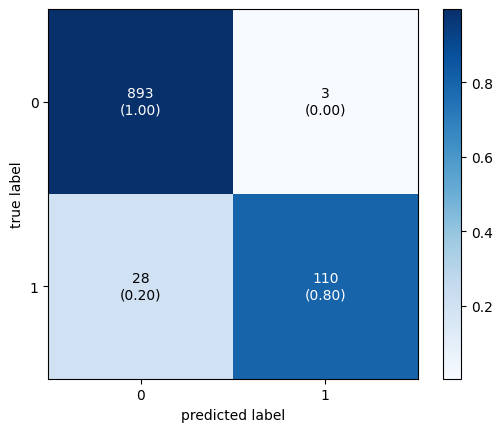

In [59]:
plot_confusion_matrix(mat,show_normed=True, colorbar=True, show_absolute=True)   
plt.show()

In [60]:
precision=precision_score(Y_test,Y_pred3)
recall=recall_score(Y_test,Y_pred3)
f1_sc=f1_score(Y_test,Y_pred3)

In [61]:
print("Precision :: ",precision)
print(" Recall   :: ",recall)
print("f1_score  :: ",f1_sc)

Precision ::  0.9734513274336283
 Recall   ::  0.7971014492753623
f1_score  ::  0.8764940239043825


In [62]:
#Logistic Regression
model.fit(X_train,Y_train)

LogisticRegression()

In [63]:
Y_pred4=model.predict(X_test)

In [64]:
print("Accuracy is :: ",accuracy_score(Y_test,Y_pred4)*100)

Accuracy is ::  94.77756286266924


In [65]:
mat=confusion_matrix(Y_test,Y_pred4)
mat

array([[895,   1],
       [ 53,  85]], dtype=int64)

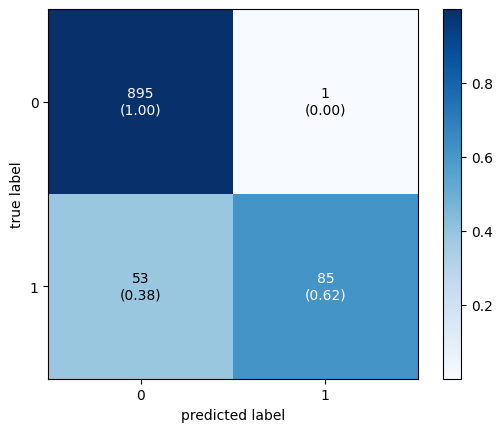

In [66]:
plot_confusion_matrix(mat,show_normed=True, colorbar=True, show_absolute=True)   
plt.show()

In [67]:
precision=precision_score(Y_test,Y_pred4)
recall=recall_score(Y_test,Y_pred4)
f1_sc=f1_score(Y_test,Y_pred4)

In [68]:
print("Precision :: ",precision)
print(" Recall   :: ",recall)
print("f1_score  :: ",f1_sc)

Precision ::  0.9883720930232558
 Recall   ::  0.6159420289855072
f1_score  ::  0.7589285714285714


In [69]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))